In [111]:

import imgaug as ia
ia.seed(1)
# imgaug uses matplotlib backend for displaying images
%matplotlib inline
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage
from imgaug import augmenters as iaa 
# imageio library will be used for image input/output
import imageio
import pandas as pd
import numpy as np
import re
import os
import glob
# this library is needed to read XML files for converting it into CSV
import xml.etree.ElementTree as ET
import shutil
from PIL import Image
from PIL import Image, ImageEnhance
import tensorflow
from skimage import transform

import gradio as gr

# Importing all necessary libraries
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
from PIL import Image
from tensorflow.keras.optimizers import RMSprop
 
img_width, img_height = 256, 256

plt.rcParams['figure.figsize'] = [15,8]

import warnings
warnings.filterwarnings("ignore")

import os
import seaborn as sns
from keras.applications.vgg16 import VGG16

# import the necessary packages
#from pyimagesearch import config
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import load_model
import numpy as np
import mimetypes
import argparse
import imutils
import cv2
import os

from skimage import data, exposure

from PIL import Image
import numpy as np
from skimage import transform
from skimage.color import rgb2gray

In [112]:
#!pip install xgboost

In [113]:
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

import statsmodels
import statsmodels.api as sm
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import ConfusionMatrixDisplay

# import the functions for visualizing the decision tree
import pydotplus
from IPython.display import Image  

from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix

In [114]:
# Read input images and assign labels based on folder names
print(os.listdir("C:\\Users\\nabhishe\\MITC_Project\\output_split_folder\\train\\"))


['Accept_Images', 'Reject_Images']


In [115]:
SIZE = 256  #Resize images

#Capture training data and labels into respective lists
train_images = []
train_labels = [] 

Found 416 files belonging to 2 classes.


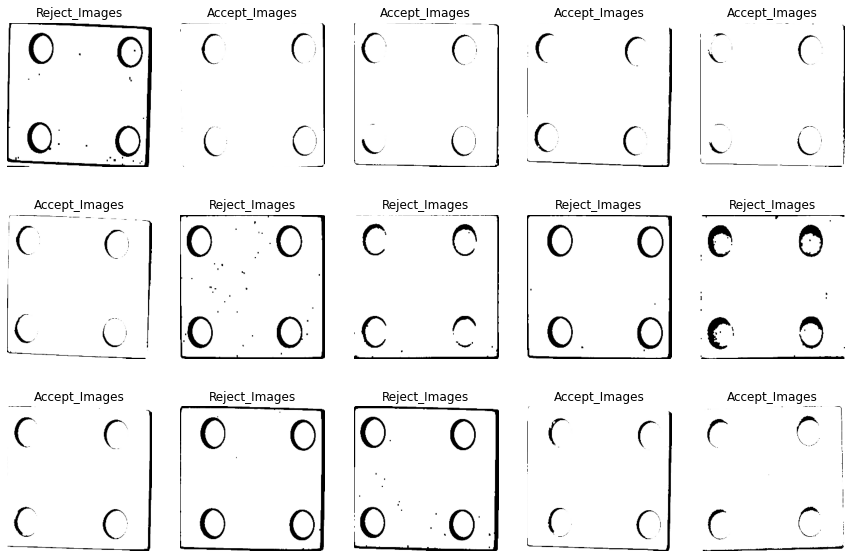

In [116]:
train_dataset = image_dataset_from_directory('C:\\Users\\nabhishe\\MITC_Project\\output_split_folder\\train',
                                             shuffle=True,
                                             batch_size=32,image_size=(256,256))
class_name =  train_dataset.class_names
plt.figure(figsize = (15,10))
for image , label in train_dataset.take(1):
    for i in range(15) :
        plt.subplot(3,5,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(class_name[label[i]])
        plt.axis("off")

In [117]:
for directory_path in glob.glob("C:\\Users\\nabhishe\\MITC_Project\\output_split_folder\\train\\*"):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path, 0)       
        img = cv2.resize(img, (SIZE, SIZE))
        #img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        train_images.append(img)
        train_labels.append(label)

Accept_Images
C:\Users\nabhishe\MITC_Project\output_split_folder\train\Accept_Images\Accept-A26491-001-Sample - 118-2...jpg
C:\Users\nabhishe\MITC_Project\output_split_folder\train\Accept_Images\Accept-A26491-001-Sample - 118-2.._38.jpg
C:\Users\nabhishe\MITC_Project\output_split_folder\train\Accept_Images\Accept-A26491-001-Sample - 120-1...jpg
C:\Users\nabhishe\MITC_Project\output_split_folder\train\Accept_Images\Accept-A26491-001-Sample - 121-2...jpg
C:\Users\nabhishe\MITC_Project\output_split_folder\train\Accept_Images\Accept-A26491-001-Sample - 124-2...jpg
C:\Users\nabhishe\MITC_Project\output_split_folder\train\Accept_Images\Accept-A26491-001-Sample - 125-2...jpg
C:\Users\nabhishe\MITC_Project\output_split_folder\train\Accept_Images\Accept-A26491-001-Sample - 44-1...jpg
C:\Users\nabhishe\MITC_Project\output_split_folder\train\Accept_Images\Accept-A26491-001-Sample - 57-1...jpg
C:\Users\nabhishe\MITC_Project\output_split_folder\train\Accept_Images\Accept-A26491-001-Sample - 62-1...

C:\Users\nabhishe\MITC_Project\output_split_folder\train\Accept_Images\Accept-A26491-001-Sample-37-2..jpg
C:\Users\nabhishe\MITC_Project\output_split_folder\train\Accept_Images\Accept-A26491-001-Sample-38-2..jpg
C:\Users\nabhishe\MITC_Project\output_split_folder\train\Accept_Images\Accept-A26491-001-Sample-39-1..jpg
C:\Users\nabhishe\MITC_Project\output_split_folder\train\Accept_Images\Accept-A26491-001-Sample-39-1._35.jpg
C:\Users\nabhishe\MITC_Project\output_split_folder\train\Accept_Images\Accept-A26491-001-Sample-4-1..jpg
C:\Users\nabhishe\MITC_Project\output_split_folder\train\Accept_Images\Accept-A26491-001-Sample-4-2..jpg
C:\Users\nabhishe\MITC_Project\output_split_folder\train\Accept_Images\Accept-A26491-001-Sample-4-2._13.jpg
C:\Users\nabhishe\MITC_Project\output_split_folder\train\Accept_Images\Accept-A26491-001-Sample-40-1..jpg
C:\Users\nabhishe\MITC_Project\output_split_folder\train\Accept_Images\Accept-A26491-001-Sample-40-2..jpg
C:\Users\nabhishe\MITC_Project\output_split

C:\Users\nabhishe\MITC_Project\output_split_folder\train\Accept_Images\Accept-A26491-001-Sample-86-2..jpg
C:\Users\nabhishe\MITC_Project\output_split_folder\train\Accept_Images\Accept-A26491-001-Sample-86-2._0.jpg
C:\Users\nabhishe\MITC_Project\output_split_folder\train\Accept_Images\Accept-A26491-001-Sample-88-2..jpg
C:\Users\nabhishe\MITC_Project\output_split_folder\train\Accept_Images\Accept-A26491-001-Sample-88-2._2.jpg
C:\Users\nabhishe\MITC_Project\output_split_folder\train\Accept_Images\Accept-A26491-001-Sample-9-1..jpg
C:\Users\nabhishe\MITC_Project\output_split_folder\train\Accept_Images\Accept-A26491-001-Sample-9-2..jpg
C:\Users\nabhishe\MITC_Project\output_split_folder\train\Accept_Images\Accept-A26491-001-Sample-9-2._1.jpg
C:\Users\nabhishe\MITC_Project\output_split_folder\train\Accept_Images\Accept-A26491-001-Sample-92-1..jpg
C:\Users\nabhishe\MITC_Project\output_split_folder\train\Accept_Images\Accept-A26491-001-Sample-92-1._44.jpg
C:\Users\nabhishe\MITC_Project\output_sp

C:\Users\nabhishe\MITC_Project\output_split_folder\train\Reject_Images\Reject-A26491-001-Sample - 158-1...jpg
C:\Users\nabhishe\MITC_Project\output_split_folder\train\Reject_Images\Reject-A26491-001-Sample - 158-2...jpg
C:\Users\nabhishe\MITC_Project\output_split_folder\train\Reject_Images\Reject-A26491-001-Sample - 159-1...jpg
C:\Users\nabhishe\MITC_Project\output_split_folder\train\Reject_Images\Reject-A26491-001-Sample - 16-2...jpg
C:\Users\nabhishe\MITC_Project\output_split_folder\train\Reject_Images\Reject-A26491-001-Sample - 161-1...jpg
C:\Users\nabhishe\MITC_Project\output_split_folder\train\Reject_Images\Reject-A26491-001-Sample - 161-2...jpg
C:\Users\nabhishe\MITC_Project\output_split_folder\train\Reject_Images\Reject-A26491-001-Sample - 162-1...jpg
C:\Users\nabhishe\MITC_Project\output_split_folder\train\Reject_Images\Reject-A26491-001-Sample - 162-2...jpg
C:\Users\nabhishe\MITC_Project\output_split_folder\train\Reject_Images\Reject-A26491-001-Sample - 164-2...jpg
C:\Users\na

C:\Users\nabhishe\MITC_Project\output_split_folder\train\Reject_Images\Reject-A26491-001-Sample - 53-2...jpg
C:\Users\nabhishe\MITC_Project\output_split_folder\train\Reject_Images\Reject-A26491-001-Sample - 54-1...jpg
C:\Users\nabhishe\MITC_Project\output_split_folder\train\Reject_Images\Reject-A26491-001-Sample - 55-1...jpg
C:\Users\nabhishe\MITC_Project\output_split_folder\train\Reject_Images\Reject-A26491-001-Sample - 55-2...jpg
C:\Users\nabhishe\MITC_Project\output_split_folder\train\Reject_Images\Reject-A26491-001-Sample - 57-2...jpg
C:\Users\nabhishe\MITC_Project\output_split_folder\train\Reject_Images\Reject-A26491-001-Sample - 58-1...jpg
C:\Users\nabhishe\MITC_Project\output_split_folder\train\Reject_Images\Reject-A26491-001-Sample - 58-2...jpg
C:\Users\nabhishe\MITC_Project\output_split_folder\train\Reject_Images\Reject-A26491-001-Sample - 59-1...jpg
C:\Users\nabhishe\MITC_Project\output_split_folder\train\Reject_Images\Reject-A26491-001-Sample - 6-1...jpg
C:\Users\nabhishe\MI

In [118]:
#Convert lists to arrays        
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [119]:
len(train_images)

416

In [120]:
test_images = []
test_labels = [] 
for directory_path in glob.glob("C:\\Users\\nabhishe\\MITC_Project\output_split_folder\\val\\*"):
    fruit_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path, 0)
        img = cv2.resize(img, (SIZE, SIZE))
        #img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(fruit_label)

C:\Users\nabhishe\MITC_Project\output_split_folder\val\Accept_Images\Accapted -20..jpg
C:\Users\nabhishe\MITC_Project\output_split_folder\val\Accept_Images\Accept-A26491-001-Sample - 116-1...jpg
C:\Users\nabhishe\MITC_Project\output_split_folder\val\Accept_Images\Accept-A26491-001-Sample - 121-1...jpg
C:\Users\nabhishe\MITC_Project\output_split_folder\val\Accept_Images\Accept-A26491-001-Sample - 123-1...jpg
C:\Users\nabhishe\MITC_Project\output_split_folder\val\Accept_Images\Accept-A26491-001-Sample - 124-1...jpg
C:\Users\nabhishe\MITC_Project\output_split_folder\val\Accept_Images\Accept-A26491-001-Sample - 52-2...jpg
C:\Users\nabhishe\MITC_Project\output_split_folder\val\Accept_Images\Accept-A26491-001-Sample - 56-1...jpg
C:\Users\nabhishe\MITC_Project\output_split_folder\val\Accept_Images\Accept-A26491-001-Sample - 59-1...jpg
C:\Users\nabhishe\MITC_Project\output_split_folder\val\Accept_Images\Accept-A26491-001-Sample - 72-1...jpg
C:\Users\nabhishe\MITC_Project\output_split_folder\va

C:\Users\nabhishe\MITC_Project\output_split_folder\val\Reject_Images\Reject-A26491-001-Sample - 23-1...jpg
C:\Users\nabhishe\MITC_Project\output_split_folder\val\Reject_Images\Reject-A26491-001-Sample - 24-2...jpg
C:\Users\nabhishe\MITC_Project\output_split_folder\val\Reject_Images\Reject-A26491-001-Sample - 27-1...jpg
C:\Users\nabhishe\MITC_Project\output_split_folder\val\Reject_Images\Reject-A26491-001-Sample - 36-1...jpg
C:\Users\nabhishe\MITC_Project\output_split_folder\val\Reject_Images\Reject-A26491-001-Sample - 38-1...jpg
C:\Users\nabhishe\MITC_Project\output_split_folder\val\Reject_Images\Reject-A26491-001-Sample - 4-2...jpg
C:\Users\nabhishe\MITC_Project\output_split_folder\val\Reject_Images\Reject-A26491-001-Sample - 40-1...jpg
C:\Users\nabhishe\MITC_Project\output_split_folder\val\Reject_Images\Reject-A26491-001-Sample - 41-2...jpg
C:\Users\nabhishe\MITC_Project\output_split_folder\val\Reject_Images\Reject-A26491-001-Sample - 45-2...jpg
C:\Users\nabhishe\MITC_Project\output_

In [121]:
#Convert lists to arrays                
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [122]:
len(test_images)

140

In [123]:
#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [124]:
#Split data into test and train datasets (already split but assigning to meaningful convention)
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

In [125]:
# Loading the Model
wtg = load_model('classification_weight_mt.hdf5')
wtg.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 32)      320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 dropout_11 (Dropout)        (None, 127, 127, 32)      0         
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 62, 62, 64)       

In [126]:
#Now, let us use features from convolutional network for RF

np_image = np.array(x_train).astype('float32')/255
np_image = transform.resize(np_image, (256, 256, 1))
np_image = np.expand_dims(np_image, axis=0)
feature_extractor = wtg.predict(x_train)

In [127]:
feature_extractor[:5]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [128]:
features = feature_extractor.reshape(feature_extractor.shape[0], -1)
X_for_training = features #This is our X input to RF

### CNN Model + Random Forest

In [129]:
#RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators = 50, random_state = 42)
model_rf.fit(X_for_training, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [130]:
#Send test data through same feature extractor process
X_test_feature = wtg.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

In [131]:
#Send test data through same feature extractor process
X_train_feature = wtg.predict(x_train)
X_train_features = X_train_feature.reshape(X_train_feature.shape[0], -1)

In [132]:
#Now predict using the trained RF model. 
prediction_rf = model_rf.predict(X_test_features)
#Inverse le transform to get original label back. 
prediction_rf = le.inverse_transform(prediction_rf)

In [133]:
#Now predict using the trained RF model. 
prediction_rf1 = model_rf.predict(X_train_features)
#Inverse le transform to get original label back. 
prediction_rf1 = le.inverse_transform(prediction_rf1)

In [134]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_rf))

Accuracy =  0.9571428571428572


In [135]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(train_labels, prediction_rf1))

Accuracy =  0.9375


In [136]:
test_report_xgb = classification_report(test_labels, prediction_rf)
print(test_report_xgb)

               precision    recall  f1-score   support

Accept_Images       1.00      0.91      0.96        70
Reject_Images       0.92      1.00      0.96        70

     accuracy                           0.96       140
    macro avg       0.96      0.96      0.96       140
 weighted avg       0.96      0.96      0.96       140



In [137]:
train_report_xgb = classification_report(train_labels, prediction_rf1)
print(train_report_xgb)

               precision    recall  f1-score   support

Accept_Images       1.00      0.88      0.93       208
Reject_Images       0.89      1.00      0.94       208

     accuracy                           0.94       416
    macro avg       0.94      0.94      0.94       416
 weighted avg       0.94      0.94      0.94       416



<AxesSubplot:>

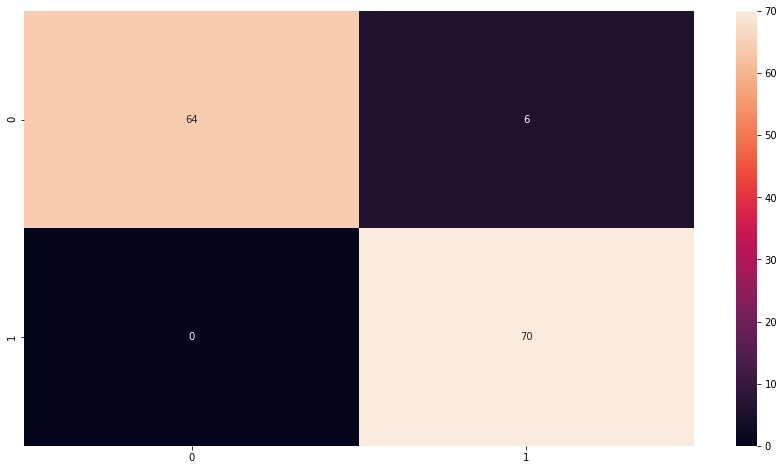

In [138]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, prediction_rf)
#print(cm)
sns.heatmap(cm, annot=True)

In [139]:
# Example 2

# Prediction based on New Model

from skimage import data, exposure

from PIL import Image
import numpy as np
from skimage import transform
from skimage.color import rgb2gray

from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import numpy as np

model2 = load_model('classification_weight.hdf5')

def accept_bright(custom_img):
    
    # Bright Accept Images
    contrast = cv2.convertScaleAbs(custom_img, alpha=1, beta=100)
    blurred = cv2.GaussianBlur(contrast, (7, 7), 0)
    thresh = cv2.threshold(blurred, 225, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=3)
    thresh = cv2.dilate(thresh, None, iterations=5)
    return thresh

def accept_low(custom_img):
    
    # Low Accept Images
    contrast = cv2.convertScaleAbs(custom_img, alpha=1, beta=110)
    blurred = cv2.GaussianBlur(contrast, (5, 5), 0)
    thresh = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=5)
    thresh = cv2.dilate(thresh, None, iterations=5)
    return thresh

def reject_bright(custom_img):
    
    # Bright Reject Images
    contrast = cv2.convertScaleAbs(custom_img, alpha=1, beta=60)
    blurred = cv2.GaussianBlur(contrast, (7, 7), 0)
    thresh = cv2.threshold(blurred, 180, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=7)
    thresh = cv2.dilate(thresh, None, iterations=3)
    return thresh

def reject_low(custom_img):
    
    # Dark Reject Images
    #contrast = cv2.convertScaleAbs(custom_img, alpha=1, beta=100)
    #blurred = cv2.GaussianBlur(contrast, (3, 3), 0)
    #thresh = cv2.threshold(blurred, 150, 255, cv2.THRESH_BINARY)[1]
    #thresh = cv2.erode(thresh, None, iterations=7)
    #thresh = cv2.dilate(thresh, None, iterations=3)
    #return thresh

    # dark reject Images with Adaptive threshold
    contrast = cv2.convertScaleAbs(custom_img, alpha=1, beta=50)
    blurred = cv2.GaussianBlur(contrast, (3, 3), 0)
    thresh = cv2.threshold(blurred, 120, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=7)
    thresh = cv2.dilate(thresh, None, iterations=3)
    return thresh

def load(img):
    threshold = 140
    if np.mean(img) > threshold:
        #image = Image.open(img)
        image = Image.fromarray(img)
        images = image.convert(mode = 'L')
        image_np = np.array(images)
        sharp = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])       # sharpening the image
        custom_img = cv2.filter2D(image_np,-1,sharp)
        
        # Blob implementation
        detector = cv2.SimpleBlobDetector_create()
        # Detect blobs.
        keypoints = detector.detect(custom_img)
        num_blobs = len(keypoints)
        if num_blobs > 0:
            w = reject_bright(custom_img)
            np_image = Image.fromarray(w)
            np_image = np.array(np_image).astype('float32')/255
            np_image = transform.resize(np_image, (256, 256, 1))
            np_image = np.expand_dims(np_image, axis=0)                  # (1,256,256,1)
            return np_image
        else:
            x = accept_bright(custom_img)
            np_image = Image.fromarray(x)
            np_image = np.array(np_image).astype('float32')/255
            np_image = transform.resize(np_image, (256, 256, 1))
            np_image = np.expand_dims(np_image, axis=0)                  # (1,256,256,1)
            return np_image
        
    elif np.mean(img) < threshold:
        adapthist_image = exposure.equalize_hist(img)
        im = Image.fromarray((adapthist_image*255).astype(np.uint8))
        images = im.convert(mode = 'L')
        image_np = np.array(images)
        sharp = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])       # sharpening the image
        custom_img=cv2.filter2D(image_np,-1,sharp)
        # Blob implementation
        detector = cv2.SimpleBlobDetector_create()
        # Detect blobs.
        keypoints = detector.detect(custom_img)
        num_blobs = len(keypoints)
        if num_blobs > 0:
            y = reject_low(custom_img)
            np_image = Image.fromarray(y)
            np_image = np.array(np_image).astype('float32')/255
            np_image = transform.resize(np_image, (256, 256, 1))
            np_image = np.expand_dims(np_image, axis=0)                  # (1,256,256,1)
            return np_image
        else:
            img = Image.fromarray(img)
            images = img.convert(mode = 'L')
            image_np = np.array(images)
            sharp = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])       # sharpening the image
            custom_img=cv2.filter2D(image_np,-1,sharp)
            z = accept_low(custom_img)
            np_image = Image.fromarray(z)
            np_image = np.array(np_image).astype('float32')/255
            np_image = transform.resize(np_image, (256, 256, 1))
            np_image = np.expand_dims(np_image, axis=0)                  # (1,256,256,1)
            return np_image


The prediction for this image is:  ['Reject_Images']
The actual label for this image is:  Accept_Images


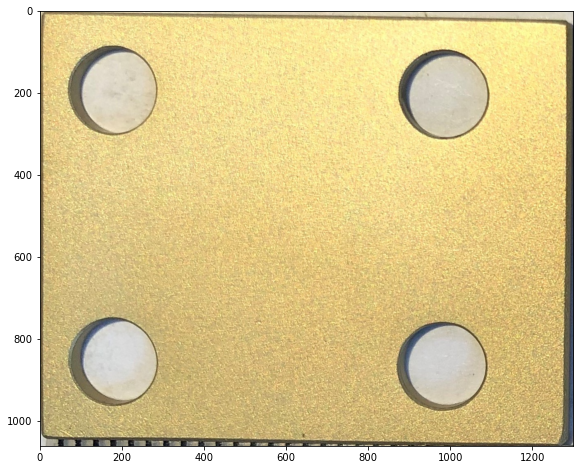

In [140]:
#Check results on a few select images
n=np.random.randint(0, x_test.shape[0])
img = plt.imread('C:\\Users\\nabhishe\\MITC_Project\\cropped_images1\\Accept_Cropped\\Accept-A26491-001-Sample-8-2.jpg')
plt.imshow(img, cmap='gray')
input_img = load(img)
#input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_feature = wtg.predict(input_img)
input_img_features = input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction = model_rf.predict(input_img_features)[0] 
prediction = le.inverse_transform([prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction)
print("The actual label for this image is: ", test_labels[n])

### CNN Model + XGBoost

In [141]:
#XGBOOST
import xgboost as xgb
model_xgb = xgb.XGBClassifier()
model_xgb.fit(X_for_training, y_train) #For sklearn no one hot encoding

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [142]:
#Send test data through same feature extractor process
X_test_feature = wtg.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

In [143]:
#Send test data through same feature extractor process
X_train_feature = wtg.predict(x_train)
X_train_features = X_train_feature.reshape(X_train_feature.shape[0], -1)

In [144]:
#Now predict using the trained XGB model. 
prediction_xgb = model_xgb.predict(X_test_features)
#Inverse le transform to get original label back. 
prediction_xgb = le.inverse_transform(prediction_xgb)

In [145]:
#Now predict using the trained XGB model. 
prediction_xgb1 = model_xgb.predict(X_train_features)
#Inverse le transform to get original label back. 
prediction_xgb1 = le.inverse_transform(prediction_xgb1)

In [146]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(train_labels, prediction_xgb1))

Accuracy =  0.9399038461538461


In [147]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_xgb))

Accuracy =  0.9642857142857143


In [148]:
train_report_xgb = classification_report(train_labels, prediction_xgb1)
print(train_report_xgb)

               precision    recall  f1-score   support

Accept_Images       0.99      0.88      0.94       208
Reject_Images       0.90      1.00      0.94       208

     accuracy                           0.94       416
    macro avg       0.95      0.94      0.94       416
 weighted avg       0.95      0.94      0.94       416



In [149]:
test_report_xgb = classification_report(test_labels, prediction_xgb)
print(test_report_xgb)

               precision    recall  f1-score   support

Accept_Images       1.00      0.93      0.96        70
Reject_Images       0.93      1.00      0.97        70

     accuracy                           0.96       140
    macro avg       0.97      0.96      0.96       140
 weighted avg       0.97      0.96      0.96       140



<AxesSubplot:>

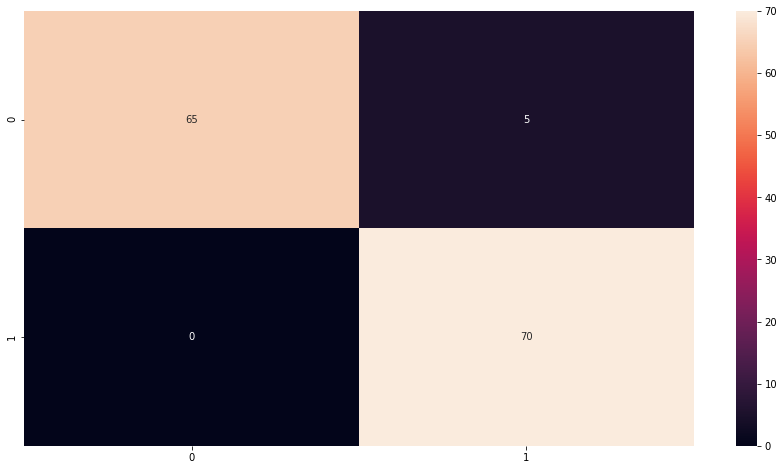

In [150]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, prediction_xgb)
#print(cm)
sns.heatmap(cm, annot=True)

### CNN Model + Decision Tree

In [151]:
model_dt = DecisionTreeClassifier(random_state = 10)

model_dt.fit(X_for_training, y_train)

DecisionTreeClassifier(random_state=10)

In [152]:
#Send test data through same feature extractor process
X_test_feature = wtg.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

In [153]:
#Send test data through same feature extractor process
X_train_feature = wtg.predict(x_train)
X_train_features = X_train_feature.reshape(X_train_feature.shape[0], -1)

In [154]:
#Now predict using the trained XGB model. 
prediction_dt = model_xgb.predict(X_test_features)
#Inverse le transform to get original label back. 
prediction_dt = le.inverse_transform(prediction_dt)

In [155]:
#Now predict using the trained XGB model. 
prediction_dt1 = model_xgb.predict(X_train_features)
#Inverse le transform to get original label back. 
prediction_dt1 = le.inverse_transform(prediction_dt1)

In [156]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_dt))

Accuracy =  0.9642857142857143


In [157]:
test_report_xgb = classification_report(test_labels, prediction_dt)
print(test_report_xgb)

               precision    recall  f1-score   support

Accept_Images       1.00      0.93      0.96        70
Reject_Images       0.93      1.00      0.97        70

     accuracy                           0.96       140
    macro avg       0.97      0.96      0.96       140
 weighted avg       0.97      0.96      0.96       140



In [158]:
train_report_xgb = classification_report(train_labels, prediction_dt1)
print(train_report_xgb)

               precision    recall  f1-score   support

Accept_Images       0.99      0.88      0.94       208
Reject_Images       0.90      1.00      0.94       208

     accuracy                           0.94       416
    macro avg       0.95      0.94      0.94       416
 weighted avg       0.95      0.94      0.94       416



<AxesSubplot:>

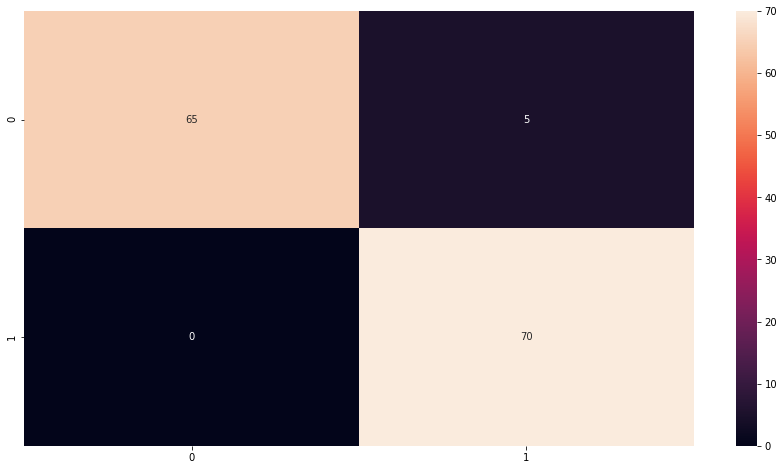

In [159]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, prediction_dt)
#print(cm)
sns.heatmap(cm, annot=True)